In [44]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from scipy.stats import ttest_ind, chi2_contingency


In [57]:

data = pd.read_excel('dataset.xlsx')




In [5]:
# Preview the first few rows of the dataset
print(data.head())

    Age Attrition     BusinessTravel  DailyRate              Department  \
0  41.0       Yes      Travel_Rarely     1102.0                   Sales   
1  49.0        No  Travel_Frequently      279.0  Research & Development   
2  37.0       Yes      Travel_Rarely     1373.0  Research & Development   
3  33.0        No  Travel_Frequently     1392.0  Research & Development   
4  27.0        No      Travel_Rarely      591.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0        2.0  Life Sciences            1.0             1.0   
1               8.0        1.0  Life Sciences            1.0             2.0   
2               2.0        2.0          Other            1.0             4.0   
3               3.0        4.0  Life Sciences            1.0             5.0   
4               2.0        1.0        Medical            1.0             7.0   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \


In [6]:


# Check the shape of the dataset
print('Shape of the dataset:', data.shape)



Shape of the dataset: (1470, 35)


In [7]:
# Check the data types of the columns
print('Data types of the columns:\n', data.dtypes)



Data types of the columns:
 Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64


In [8]:
# Check the summary statistics of the dataset
print('Summary statistics of the dataset:\n', data.describe())



Summary statistics of the dataset:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1457.000000  1470.000000     1470.000000   
mean      1024.865306                 2.723404    65.891156        2.729932 

In [9]:
# Check the missing values in the dataset
print('Missing values in the dataset:\n', data.isnull().sum())

Missing values in the dataset:
 Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction     13
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                8
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAt

In [11]:
# View the unique values of a categorical column in the dataset
print(data["Attrition"].unique())

['Yes' 'No']


In [14]:
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education']

In [16]:
for c in categorical_columns:
    print(c)
    print(data[c].unique())
    print()

Attrition
['Yes' 'No']

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

DistanceFromHome
[ 1.  8.  2.  3. 24. 23. 27. 16. 15. 26. 19. 21.  5. 11.  9.  7.  6. 10.
  4. 25. 12. 18. 29. 22. 14. 20. 28. 17. 13.]

Education
[2. 1. 4. 3. 5.]



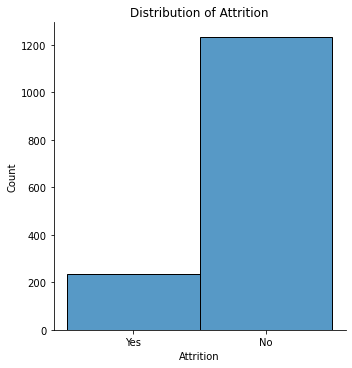

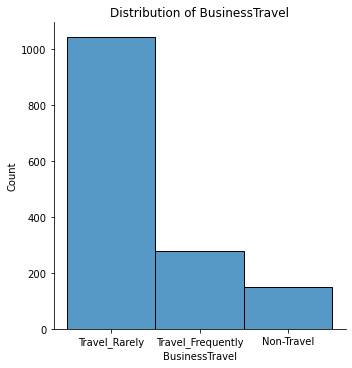

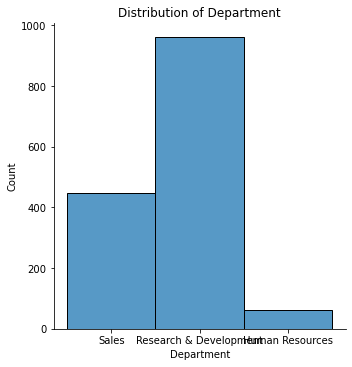

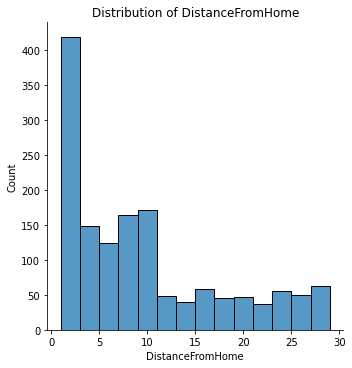

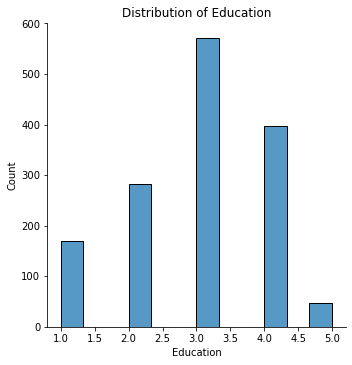

In [18]:
for c in categorical_columns:
    # Visualize the distribution of a numeric column
    sns.displot(data[c], kde=False)
    plt.title('Distribution of '+str(c))
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

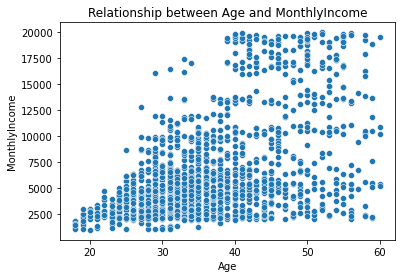

In [20]:
# Visualize the relationship between two numeric columns
sns.scatterplot(data=data, x='Age', y='MonthlyIncome')
plt.title('Relationship between Age and MonthlyIncome')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

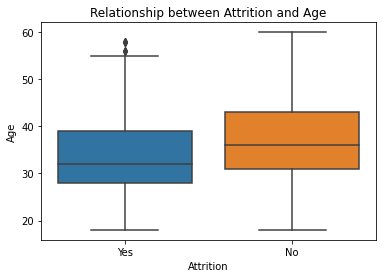

In [22]:
# Visualize the relationship between a numeric column and a categorical column
sns.boxplot(data=data, x='Attrition', y='Age')
plt.title('Relationship between Attrition and Age')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

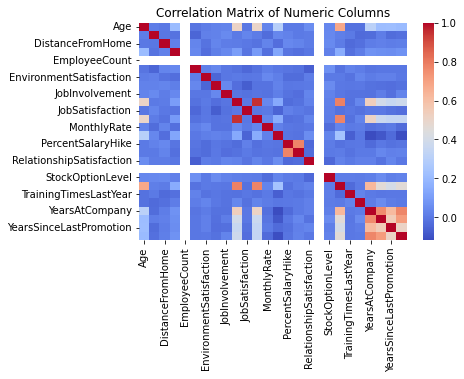

In [24]:
# Visualize the correlation matrix of the numeric columns
sns.heatmap(data.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

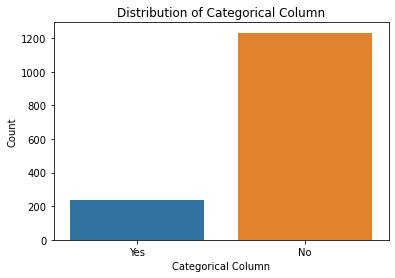

In [25]:
# Visualize the distribution of a categorical column
sns.countplot(data=data, x='Attrition')
plt.title('Distribution of Categorical Column')
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.show()

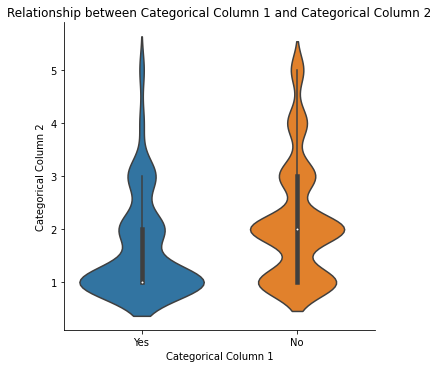

In [28]:
# Visualize the relationship between two categorical columns
sns.catplot(data=data, x='Attrition', y='JobLevel', kind='violin')
plt.title('Relationship between Categorical Column 1 and Categorical Column 2')
plt.xlabel('Categorical Column 1')
plt.ylabel('Categorical Column 2')
plt.show()

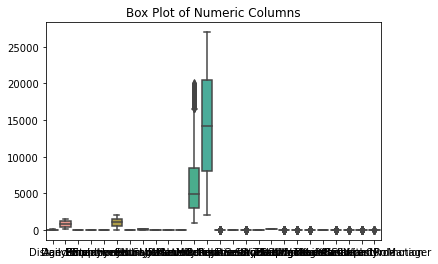

In [29]:
# Check for outliers in numeric columns using box plots
sns.boxplot(data=data.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plot of Numeric Columns')
plt.show()

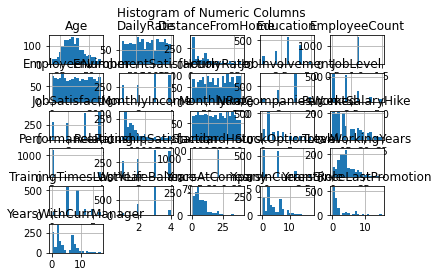

In [30]:
# Check the distribution of numeric columns using histograms
data.select_dtypes(include=['int64', 'float64']).hist(bins=20)
plt.suptitle('Histogram of Numeric Columns')
plt.show()

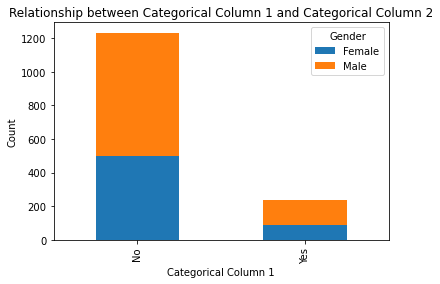

In [31]:
# Check the relationship between two categorical columns using a stacked bar plot
pd.crosstab(data['Attrition'], data['Gender']).plot(kind='bar', stacked=True)
plt.title('Relationship between Categorical Column 1 and Categorical Column 2')
plt.xlabel('Categorical Column 1')
plt.ylabel('Count')
plt.show()

In [32]:
# Perform a t-test to compare the means of two numeric columns
t_stat, p_value = ttest_ind(data['Age'], data['MonthlyIncome'], equal_var=False)
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: nan
P-value: nan


In [33]:
# Perform a chi-squared test to test for association between two categorical columns
cont_table = pd.crosstab(data['Attrition'], data['Gender'])
chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)
print('Chi-squared statistic:', chi2_stat)
print('P-value:', p_value)
print('Degrees of freedom:', dof)

Chi-squared statistic: 1.1169671241970975
P-value: 0.29057244902890855
Degrees of freedom: 1


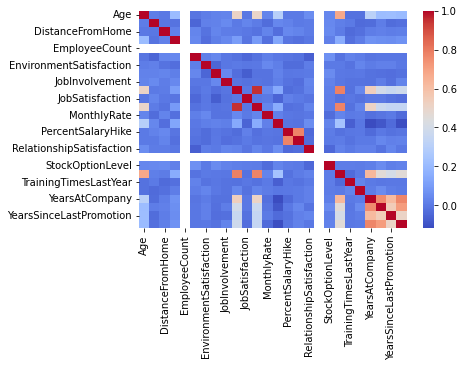

In [35]:
# Analyze feature correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

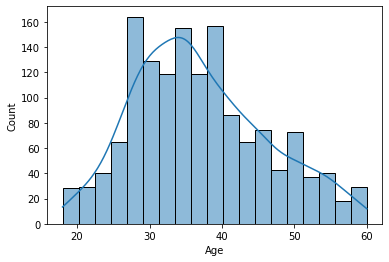

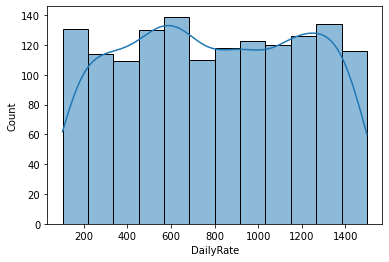

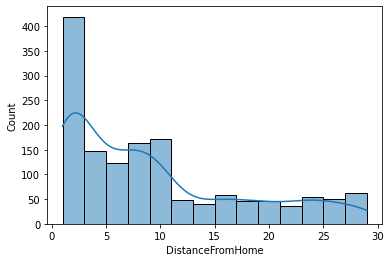

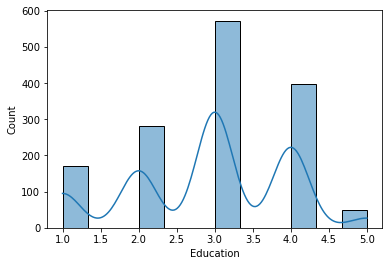

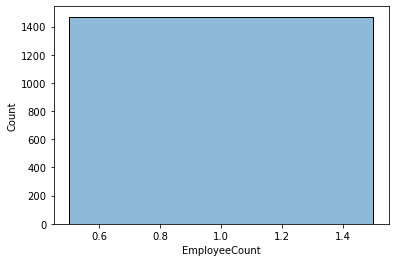

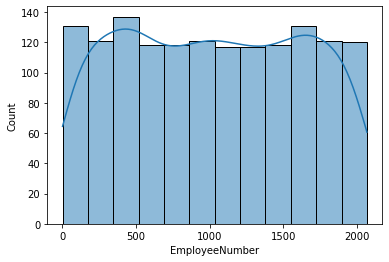

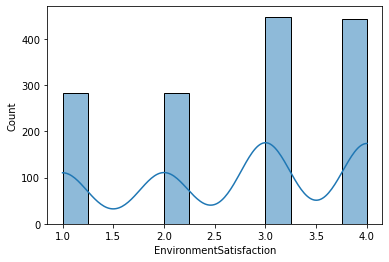

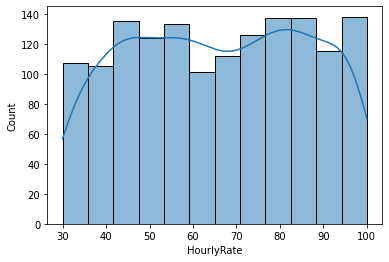

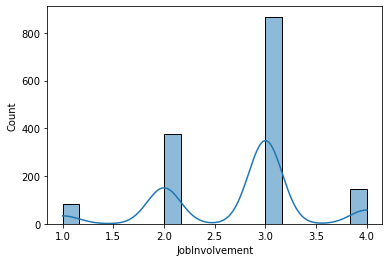

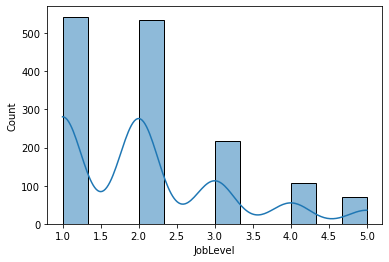

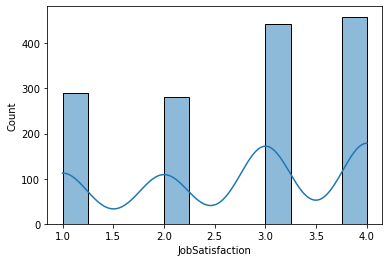

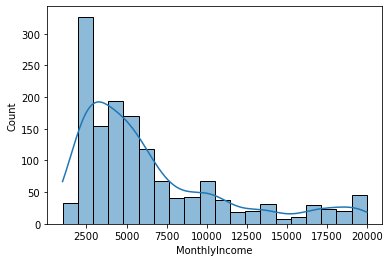

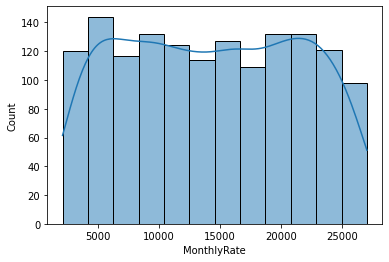

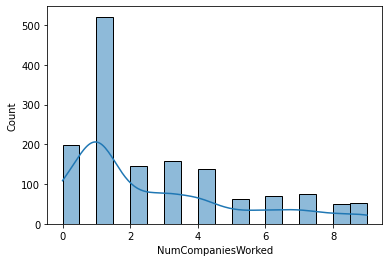

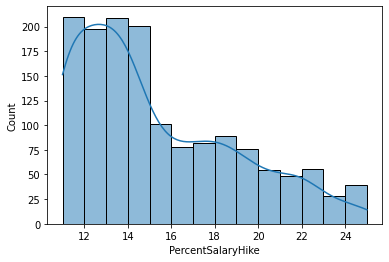

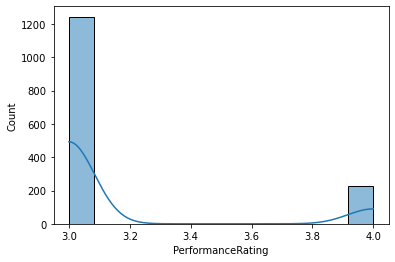

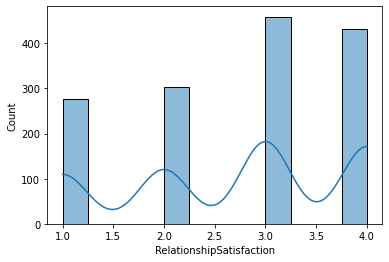

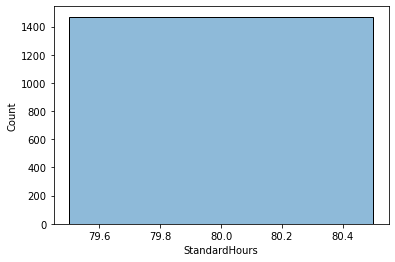

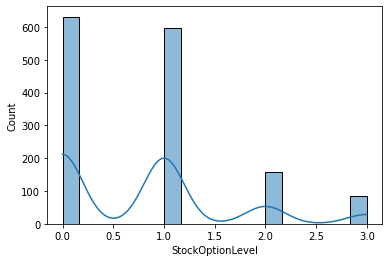

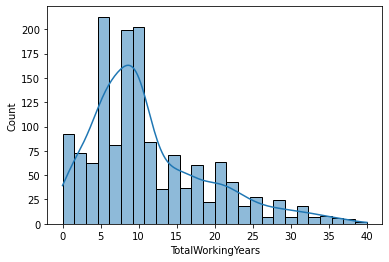

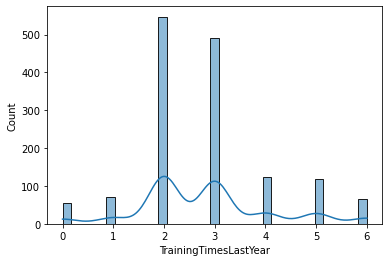

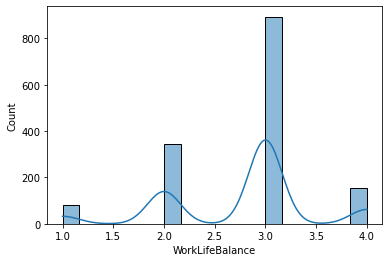

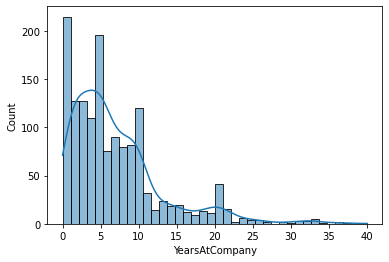

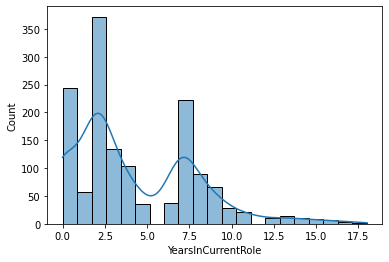

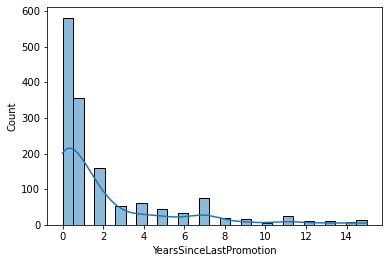

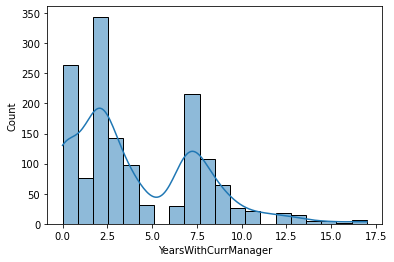

In [36]:
# Analyze feature distribution
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.show()

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


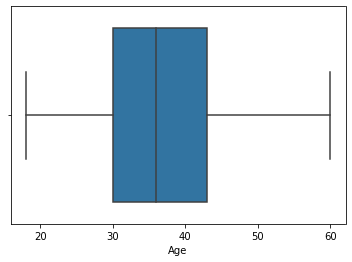

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


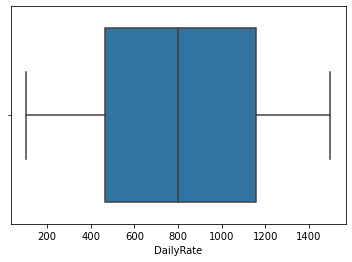

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


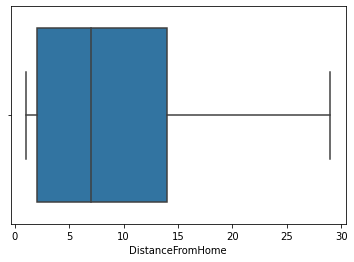

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


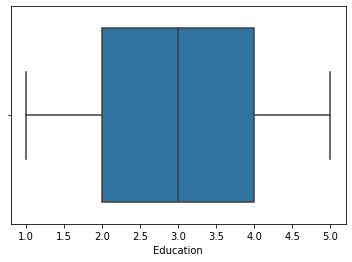

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


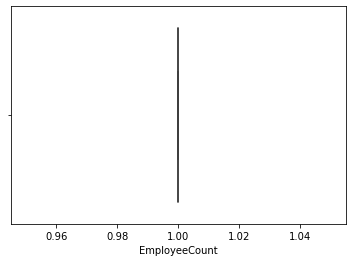

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


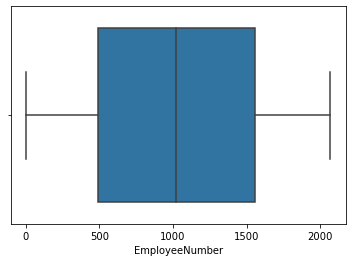

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


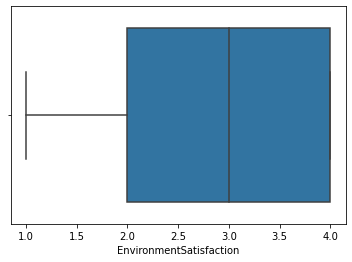

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


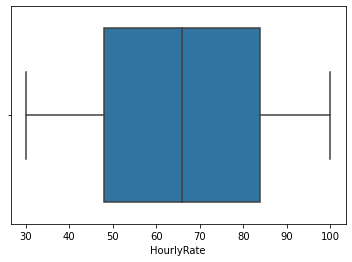

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


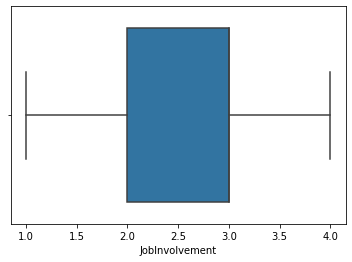

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


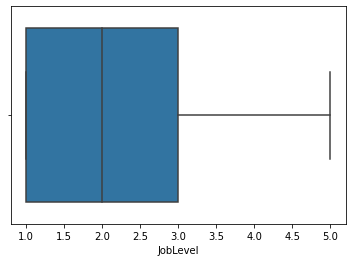

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


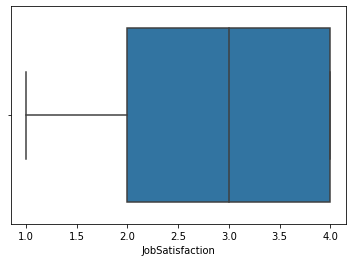

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


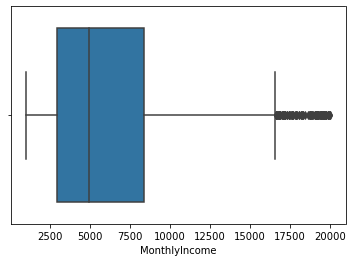

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


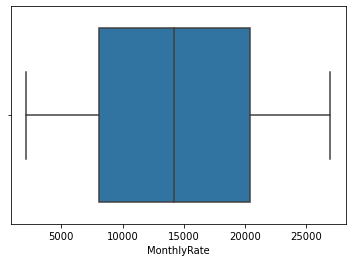

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


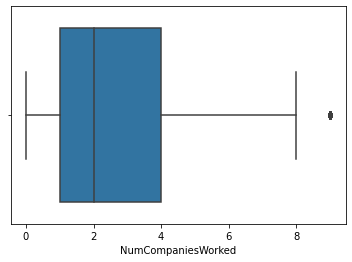

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


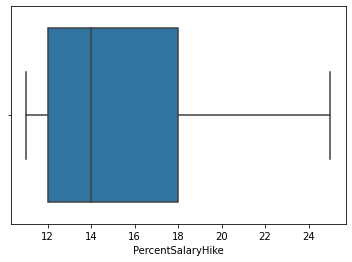

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


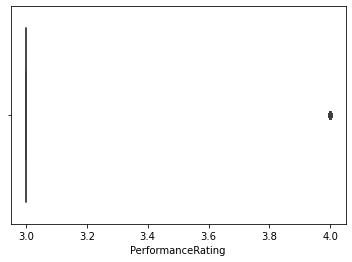

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


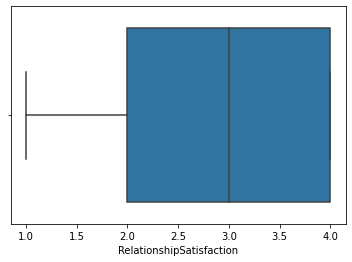

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


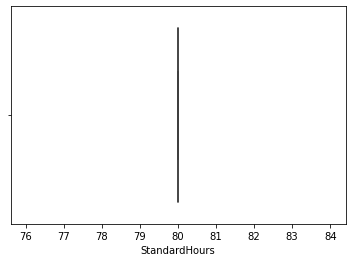

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


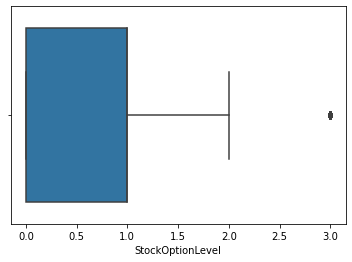

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


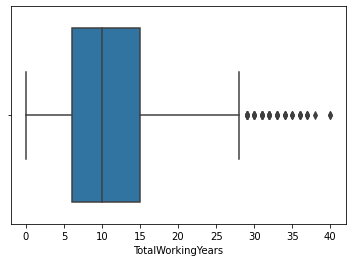

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


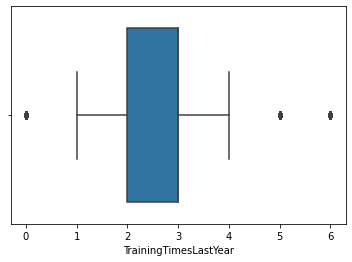

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


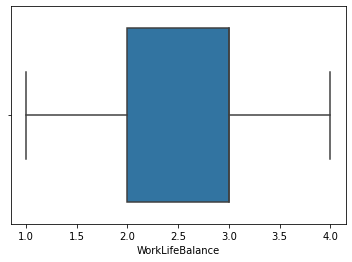

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


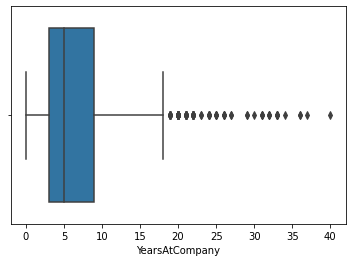

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


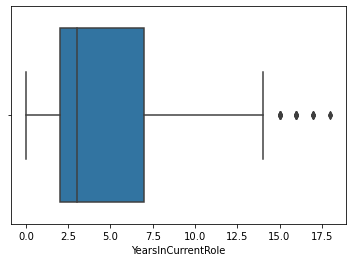

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


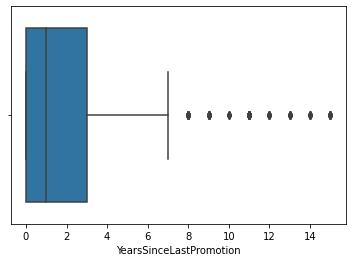

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


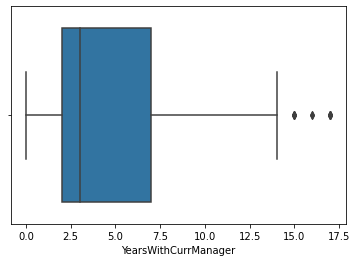

In [37]:
# Analyze feature outliers
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


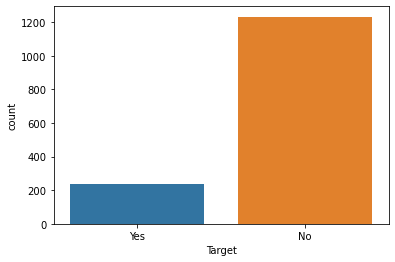

In [39]:
# Analyze class imbalance
sns.countplot(data['Attrition'])
plt.xlabel('Target')
plt.show()

In [40]:
# Check for duplicates
print('Number of duplicates in the dataset:', data.duplicated().sum())


Number of duplicates in the dataset: 0


<AxesSubplot:xlabel='MonthlyIncome'>

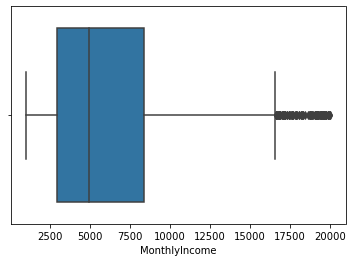

In [41]:
# Boxplot visualization
import seaborn as sns

sns.boxplot(x=data['MonthlyIncome'])


In [55]:
#didnt work
# Remove outliers using z-score method
from scipy import stats
z_scores = stats.zscore(data["MonthlyIncome"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data["MonthlyIncome"] = data["MonthlyIncome"][filtered_entries]

<AxesSubplot:xlabel='MonthlyIncome'>

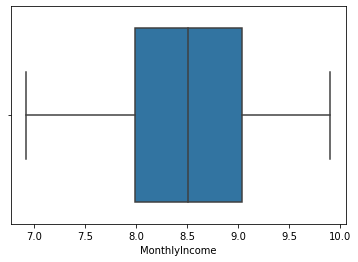

In [61]:
import seaborn as sns

sns.boxplot(x=data['MonthlyIncome'])

In [60]:
# Apply logarithmic transformation to a column
data["MonthlyIncome"] = np.log(data["MonthlyIncome"])

In [62]:
# Apply label encoding to a categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Attrition"] = le.fit_transform(data["Attrition"])


C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


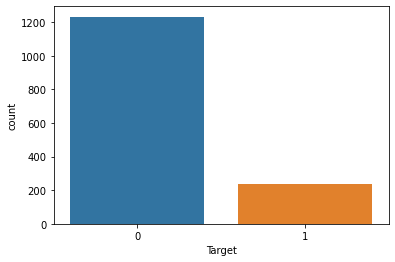

In [63]:
# Analyze class imbalance
sns.countplot(data['Attrition'])
plt.xlabel('Target')
plt.show()

In [64]:
# Apply one-hot encoding to a categorical column
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'DistanceFromHome', 'Education'])

In [68]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'DistanceFromHome_1.0', 'DistanceFromHome_2.0',
       'DistanceFromHome_3.0', 'DistanceFromHome_4.0', 'DistanceFromHome_5.0',
       'DistanceFromHome_6.0', 'DistanceFromHome_7.0

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [75]:
# Feature scaling using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(data[['Age', 'MonthlyIncome']])

In [77]:
print(X_scaled)

[[ 0.4463504   0.21605573]
 [ 1.32236521 -0.01792146]
 [ 0.008343   -1.36915065]
 ...
 [-1.08667552  0.25301124]
 [ 1.32236521  0.05647581]
 [-0.32016256 -0.2475437 ]]


<AxesSubplot:>

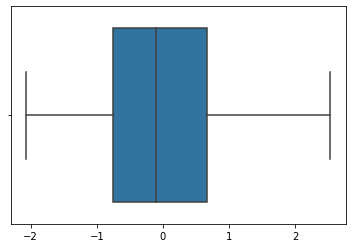

In [79]:
import seaborn as sns

sns.boxplot(x=X_scaled[:,0])